In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import (Embedding, Bidirectional, LSTM, Dense,Dropout, BatchNormalization, SpatialDropout1D , Input)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
print("imported libraries successfully")


imported libraries successfully


In [21]:
from tensorflow.keras.layers import Conv1D,MaxPool1D
from wordcloud import WordCloud

In [4]:
fake= pd.read_csv("E:/fake-news-detector/data/raw/Fake.csv")


In [5]:
real= pd.read_csv("E:/fake-news-detector/data/raw/True.csv")


In [6]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [10]:
print("Fake df shape :", fake.shape)
print("Real df shape :", real.shape)

Fake df shape : (23481, 4)
Real df shape : (21417, 4)


In [8]:
fake['subject'].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

In [9]:
real['subject'].value_counts()


subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

C:\Users\sawan\AppData\Local\Temp\ipykernel_19880\3125341455.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='subject' , data=fake, palette='coolwarm');


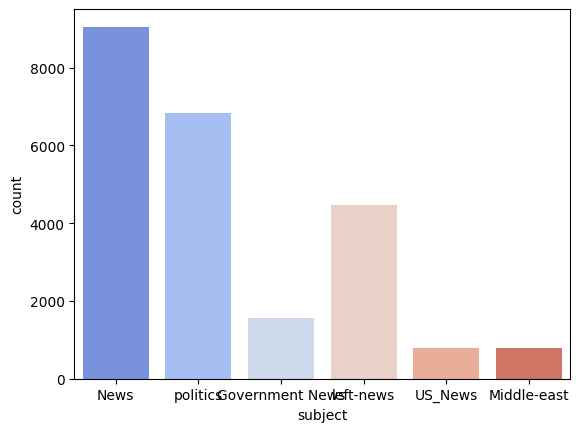

In [13]:
sns.countplot(x='subject' , data=fake, palette='coolwarm');

# Wordcloud

In [14]:
text= ' '.join(fake['text'].tolist())

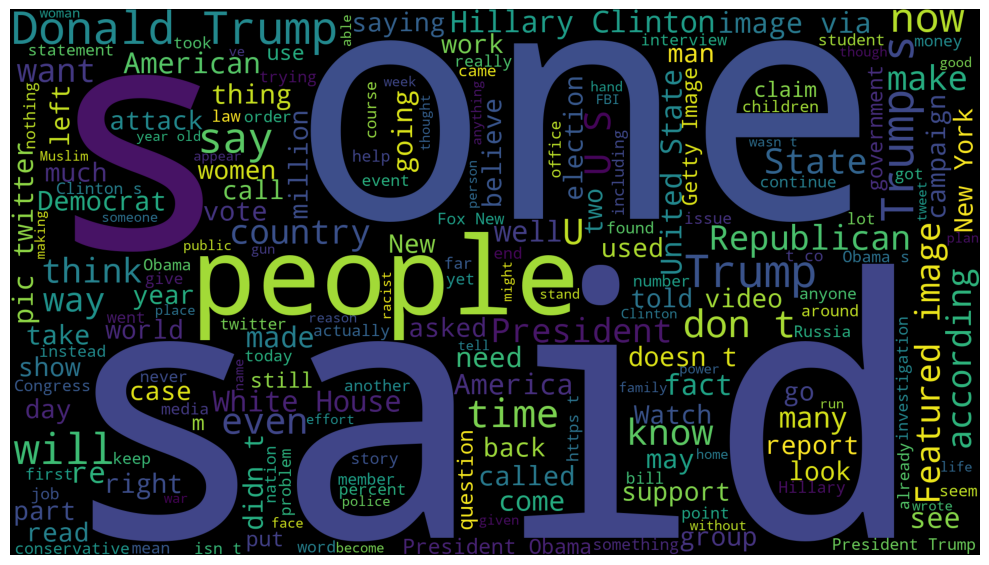

In [23]:
wordcloud = WordCloud(width=1920 , height=1080).generate(text)
fig= plt.figure(figsize=(10,10))
plt.axis('off')
plt.tight_layout()
plt.imshow(wordcloud)

In [25]:
text= ' '.join(real['text'].tolist())


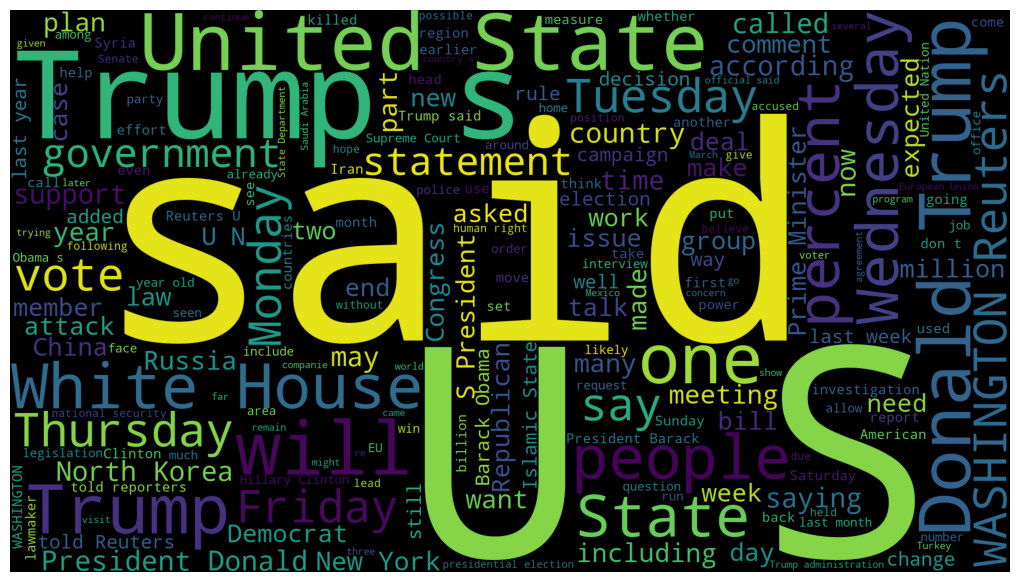

In [27]:
wordcloud = WordCloud(width=1920 , height=1080).generate(text)
fig= plt.figure(figsize=(10,10))
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

In [ ]:
# differences in text